In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/manifoldailearning/mlops-live-manifoldailearning/main/Step-1-Experimentation/onlinefoods.csv'

response = requests.get(url)

if response.status_code == 200:
    df = pd.read_csv(url)
else:
    print(f'Data not loaded {response.status_code}')

In [3]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [5]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


<Axes: xlabel='latitude', ylabel='longitude'>

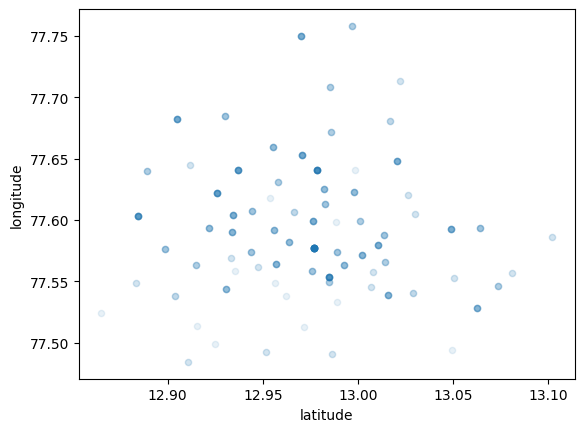

In [10]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',
        x='latitude',
        y='longitude',
       alpha=0.1)

In [13]:
df = df.drop(['Unnamed: 12'],axis=1)

In [14]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

In [15]:
df.drop(['latitude', 'longitude','Pin code'],axis=1,inplace=True)

In [16]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Output', 'Feedback'],
      dtype='object')

In [17]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Yes,Positive


In [18]:
df.describe()

,Age,Family size
count,388.000000,388.000000
mean,24.628866,3.280928
std,2.975593,1.351025
min,18.000000,1.000000
25%,23.000000,2.000000
50%,24.000000,3.000000
75%,26.000000,4.000000
max,33.000000,6.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         388 non-null    int64 
 1   Gender                      388 non-null    object
 2   Marital Status              388 non-null    object
 3   Occupation                  388 non-null    object
 4   Monthly Income              388 non-null    object
 5   Educational Qualifications  388 non-null    object
 6   Family size                 388 non-null    int64 
 7   Output                      388 non-null    object
 8   Feedback                    388 non-null    object
dtypes: int64(2), object(7)
memory usage: 27.4+ KB


In [20]:
df.Gender.value_counts()

Gender
Male      222
Female    166
Name: count, dtype: int64

In [21]:
df.Occupation.value_counts()

Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64

<Axes: >

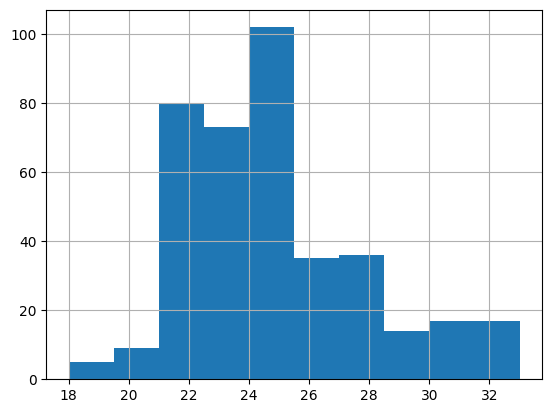

In [22]:
df.Age.hist()

In [49]:
y = df['Output'].copy()
df = df.drop(['Output'],axis=1)

In [50]:
df.describe(include='O')

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Feedback
count,388,388,388,388,388,388
unique,2,3,4,5,5,2
top,Male,Single,Student,No Income,Graduate,Positive
freq,222,268,207,187,177,317


In [51]:
# one Hot Encoder
cat_columns = df.describe(include='O').columns

In [52]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

hotendcoded= one_hot.fit_transform(df[cat_columns])

In [53]:
one_hot.get_feature_names_out()

array(['Gender_Female', 'Gender_Male', 'Marital Status_Married',
       'Marital Status_Prefer not to say', 'Marital Status_Single',
       'Occupation_Employee', 'Occupation_House wife',
       'Occupation_Self Employeed', 'Occupation_Student',
       'Monthly Income_10001 to 25000', 'Monthly Income_25001 to 50000',
       'Monthly Income_Below Rs.10000', 'Monthly Income_More than 50000',
       'Monthly Income_No Income', 'Educational Qualifications_Graduate',
       'Educational Qualifications_Ph.D',
       'Educational Qualifications_Post Graduate',
       'Educational Qualifications_School',
       'Educational Qualifications_Uneducated', 'Feedback_Negative ',
       'Feedback_Positive'], dtype=object)

In [54]:
one_hot.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Married', 'Prefer not to say', 'Single'], dtype=object),
 array(['Employee', 'House wife', 'Self Employeed', 'Student'],
       dtype=object),
 array(['10001 to 25000', '25001 to 50000', 'Below Rs.10000',
        'More than 50000', 'No Income'], dtype=object),
 array(['Graduate', 'Ph.D', 'Post Graduate', 'School', 'Uneducated'],
       dtype=object),
 array(['Negative ', 'Positive'], dtype=object)]

In [55]:
df_transform=pd.DataFrame( hotendcoded.todense(),columns = one_hot.get_feature_names_out())
df_transform.head()

,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Employee,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_10001 to 25000,...,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Feedback_Negative,Feedback_Positive
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [40]:
#pd.get_dummies()

In [56]:
final_df = pd.concat([df_transform,
           df[['Age','Family size']]
          ],
          axis=1)

In [57]:
final_df.head()

,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Employee,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_10001 to 25000,...,Monthly Income_No Income,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Feedback_Negative,Feedback_Positive,Age,Family size
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,20,4
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,24,3
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22,3
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,22,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,22,4


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_df)

StandardScaler()

In [59]:
scaleddf =scaler.transform(final_df)

In [67]:
y =y.replace({'Yes':'1','No':'0'}).astype(int)
y.value_counts()

Output
1    301
0     87
Name: count, dtype: int64

In [64]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = (scaleddf,y,test_size=0.2,train_size=0.8,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3702953319.py, line 1)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(